In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def a(t):
    return np.sin(2 * np.pi*t) + np.random.normal(0, 0.1, len(t))

def theta(t):
    phase = (2*np.pi*t) % (2*np.pi)
    return phase + np.random.normal(0, 0.1, len(t))

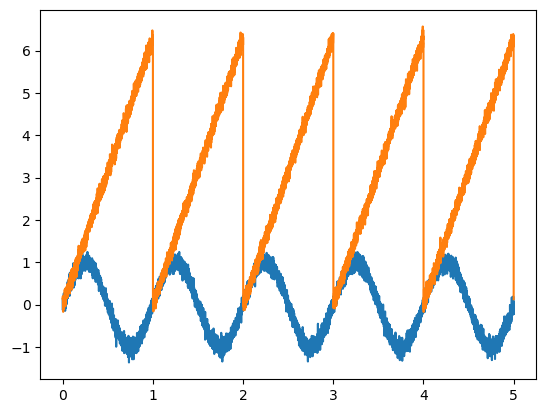

In [ ]:
t = np.linspace(0, 5, 10000)
a_theta = np.concatenate([a(t).reshape(-1, 1), theta(t).reshape(-1, 1)], axis=1)
fig, ax = plt.subplots()
ax.plot(t, a_theta[:, 0])
ax.plot(t, a_theta[:, 1])

In [ ]:
def mutual_information(x, y, bins=10):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_information_from_counts(c_xy)
    return c_xy, mi

def mutual_information_from_counts(c_xy):
    # compute mutual information account for zero counts
    c_xy = c_xy + 1e-10
    p_xy = c_xy / np.sum(c_xy)
    p_x = np.sum(p_xy, axis=1, keepdims=True)
    p_y = np.sum(p_xy, axis=0, keepdims=True)
    mi = np.sum(p_xy * np.log(p_xy / (p_x * p_y)))
    return mi

In [ ]:
def plot_mi(a_theta):
    bin_choices = [10, 20, 50, 100, 200, int(np.sqrt(len(t) / 5))]  # choice of bins will affect estimated MI
    fig, axes = plt.subplots(1, len(bin_choices), figsize=(10, 10))
    for i, n_bins in enumerate(bin_choices):
        c_xy, mi = mutual_information(a_theta[:, 0], a_theta[:, 1], bins=n_bins)
        ax = axes[i]
        ax.imshow(c_xy)
        ax.set(title=f"MI: {mi:.2f}")
        ax.set(xlabel="theta")
    axes[0].set(xlabel="theta", ylabel="a")

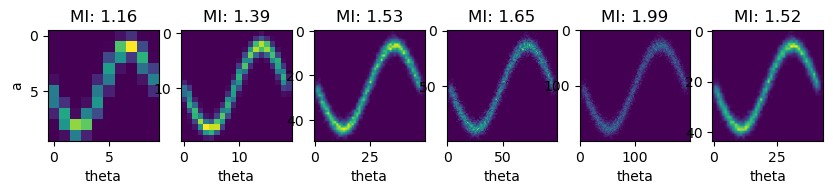

In [ ]:
plot_mi(a_theta)  # Has some MI

In [ ]:
# shuffle the data
a_theta_shuffled = a_theta.copy()
a_theta_shuffled[:, 0] = np.random.permutation(a_theta_shuffled[:, 0])

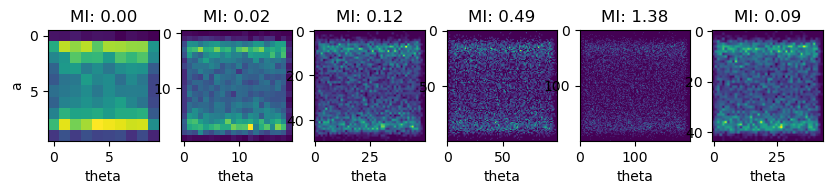

In [ ]:
plot_mi(a_theta_shuffled)  # MI is approximately zero as expected

In [ ]:
train_x = np.concatenate([a_theta, a_theta_shuffled], axis=0)
train_y = np.concatenate([np.ones(len(a_theta)), np.zeros(len(a_theta_shuffled))], axis=0)

In [ ]:
# use sklearn to train a 2-layer neural network; can be significantly faster if we use other packages
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(32, 32), activation="relu", solver="adam", max_iter=1000, verbose=True)
clf.fit(train_x, train_y)

Iteration 1, loss = 0.67473174
Iteration 2, loss = 0.60919807
Iteration 3, loss = 0.55411588
Iteration 4, loss = 0.52059895
Iteration 5, loss = 0.49736015
Iteration 6, loss = 0.47747894
Iteration 7, loss = 0.46060745
Iteration 8, loss = 0.44902316
Iteration 9, loss = 0.44004561
Iteration 10, loss = 0.43125925
Iteration 11, loss = 0.42490867
Iteration 12, loss = 0.42073561
Iteration 13, loss = 0.41504305
Iteration 14, loss = 0.41092699
Iteration 15, loss = 0.40850841
Iteration 16, loss = 0.40493743
Iteration 17, loss = 0.40258104
Iteration 18, loss = 0.39780637
Iteration 19, loss = 0.39530985
Iteration 20, loss = 0.39323316
Iteration 21, loss = 0.39025854
Iteration 22, loss = 0.38879470
Iteration 23, loss = 0.38718072
Iteration 24, loss = 0.38415862
Iteration 25, loss = 0.38389366
Iteration 26, loss = 0.38087065
Iteration 27, loss = 0.37963079
Iteration 28, loss = 0.37928122
Iteration 29, loss = 0.37808703
Iteration 30, loss = 0.37667251
Iteration 31, loss = 0.37447763
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=1000, verbose=True)

In [ ]:
def likelihood_ratio_mi(clf):
    mi = (clf.predict_log_proba(a_theta)[:, 1] - clf.predict_log_proba(a_theta)[:, 0]).mean()
    return mi

In [ ]:
mi = likelihood_ratio_mi(clf)
print(f"MI with a neural network classifier: {mi:.2f}")

MI with a neural network classifier: 1.35
